## 오차제곱합

$$
E = {{1\over2}\sum_{k}{(y_k - t_k)^2}}
$$
* $y_k$: 신경망의 출력
* $t_k$: 정답 레이블
* $k$: 차원의 수

In [1]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 정답 레이블 - 원-핫 인코딩 사용(인덱스의 데이터가 0이면 False, 1이면 True로 True인 값의 인덱스가 실제 값)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 신경망 출력 결과 - 소프트맥스 함수를 활성화 함수로 사용(입력된 이미지가 각 숫자일 확률)
# 입력 이미지가 2일 확률이 가장 높다고 가정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 입력 이미지가 7일 확률이 가장 높다고 가정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## 교차 엔트로피 오차

$$
E = -\sum_{k}{t_k{\log{y_k}}}
$$
* $log$: 밑이 $e$인 자연로그
* $y_k$: 신경망의 출력
* $t_k$: 정답 레이블

$t_k$는 정답에 해당하는 인덱스만 1이고 나머지는 0인 원-핫 인코딩이 적용된 배열이다.  
따라서 위의 식은 실질적으로 정답일 때의 추정의 자연로그 값이 된다.  
> e.g. 정답 레이블은 2이고, 이 때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-\log0.6$, 약 0.51이 된다. 또한, 같은 조건에서 신경망 출력이 0.1이라면 $-\log0.1$, 약 2.30이 된다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    # np.log의 값이 0으로 -inf가 되지 않게 하기 위해 아주 작은 값인 delta를 더한다.
    return -np.sum(t * np.log(y + delta))
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 입력 이미지가 7일 확률이 가장 높다고 가정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## 전체 데이터에 대한 교차 엔트로피 오차의 합

$$
E = -{1\over N}\sum_{n}\sum_{k}{t_{nk}{\log{y_{nk}}}}
$$
전체 데이터의 학습 결과에 따른 교차 엔트로피 오차의 합을 N으로 나눠 교차 엔트로피 오차 평균을 구한다.  
> 데이터가 커지면 커질수록 전체 데이터를 가지고 결과를 내기엔 한계가 있기에 그 중 일부를 추려 '근사치'로 이용하는 '미니배치'를 사용하기도 한다.
60,000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것을 '미니 배치 학습'이라고 한다.

In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]

print(batch_mask)
print(X_batch)
print(y_batch)

[53817 24380 54243 57497 23184 20712 53484 53069 27230 53397]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
def cross_entropy_error_encoded(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+ 1e-7))/batch_size

# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error_encoded(np.array(y), np.array(t)))

# 입력 이미지가 7일 확률이 가장 높다고 가정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error_label(np.array(y), np.array(t)))

0.510825457099338
23.718987110506905


### 왜 손실 함수를 사용하는가?
* 정확도를 지표로 삼으면 대부분의 값의 미분이 0이 된다.
* 손실 함수는 연속적인 값이기 때문에 미분이 0이 될 염려가 없다.

## 미분

$$
{df(x)\over dx} = \displaystyle\lim_{h\to 0}{f(x+h) - f(x)\over h}
$$
위의 식을 코드로 작성하면 아래와 같다.

In [6]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x))/h

이러한 미분을 수치 미분이라 하는데, 수치 미분은 정확한 수학적 미분을 구할 수 없는 상황에서 사용하는 미분 근사치를 구하는 방법이다.
> 위의 코드에는 개선해야 할 두 가지 문제점이 있다.
* 반올림 오차 문제: 0의 근접값을 표현하기 위해 위와 같이 표기를 한다면 반올림 문제가 생기기 때문에 오차가 생기게 된다.
* 차분 문제: 진정한 미분은 x위치의 기울기에 해당하지만, 위의 구현에서는 (x_h)와 x사이의 기울기에 해당한다. 그렇기에 실제 기울기와 차이가 생길 수 밖에 없고 이 차이를 줄이기 위해 **중앙 차분**을 쓰기도 한다.
    * 중앙 차분: $(x+h) - (x-h)$

이 두 문제점을 개선한 미분 공식은 아래와 같다.

In [7]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [8]:
# 간단한 미분 구현
def function_1(x):
    return 0.01*x**2+0.1*x

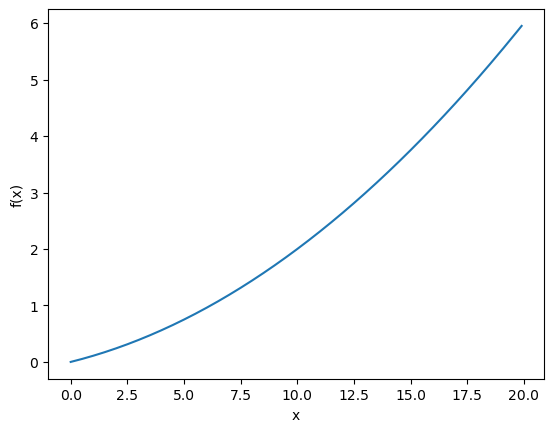

In [9]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [10]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


$0.01x^2+0.1x$의 미분은 $0.02x+0.1$로 5와 10을 대입하면 각각 0.2와 0.3이 된다.  
개선된 수치미분을 사용하면 실제 값과 오차가 거의 없다는 것을 확인할 수 있다.

## 편미분
$$
f(x_0, x_1) = {x_0}^2 + {x_1}^2
$$

<br>

### 편미분 수식
$$
{\partial f \over \partial x_0} or {\partial f \over \partial x_1}
$$

In [11]:
def function_2(x):
    return np.sum(x**2)

In [12]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [13]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp1, 4.0)

7.999999999999119

## 기울기
* 모든 변수의 편미분을 벡터로 정리한 것

In [14]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] =  tmp_val

    return grad

In [15]:
print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


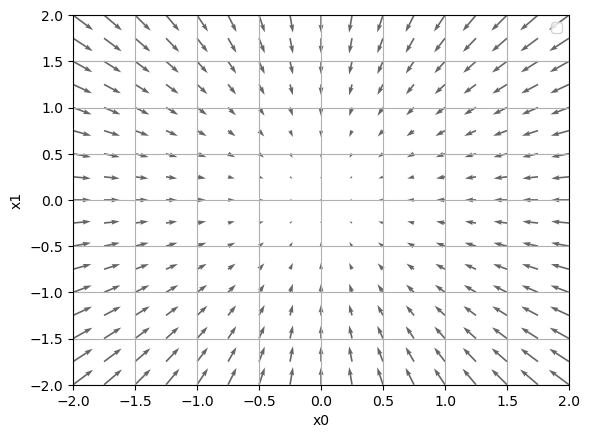

In [16]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

* 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

## 경사하강법
* 기울기를 이용하여 손실함수의 최소값을 찾으려는 방법

$$
x_0 = x_0 - {\eta{\partial f \over \partial x_0}}
$$
$$
x_1 = x_1 - {\eta{\partial f \over \partial x_1}}
$$
$\eta$기호는 신경망 학습에서 학습률이라고 부른다.
> 위의 수식은 1회에 대한 갱신이고, 갱신을 반복하면서 서서히 함수의 값을 줄이는 것이 목표이다.  
> 변수의 수가 늘어나도 같은 식(각 변수의 편미분 값)으로 갱신하게 된다.

In [17]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, 0.1, 100)

array([-6.11110793e-10,  8.14814391e-10])

In [19]:
# 학습률이 너무 큰 경우
init_x = np.array([-3.0, 4.0])
over = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
under = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
over, under

(array([-2.58983747e+13, -1.29524862e+12]), array([-2.99999994,  3.99999992]))

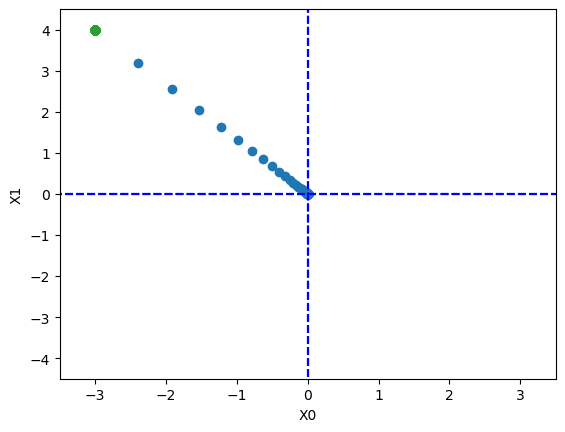

In [20]:
import numpy as np
import matplotlib.pylab as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

# 적절한 학습량
init_x = np.array([-3.0, 4.0])    

x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

# 너무 많은 학습량
init_x = np.array([-3.0, 4.0])    

x, x_history = gradient_descent(function_2, init_x, lr=10.0, step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

# 너무 적은 학습량
init_x = np.array([-3.0, 4.0])    

x, x_history = gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

plt.show()


## 신경망에서의 기울기
* 가중치가 $W$, 손실 함수가 $L$인 신경망을 $\partial L \over \partial W$으로 나타낼 수 있다.

$$
W = \begin{pmatrix}w_11&w_12&w_13\\w_21&w_22&w_23\\ \end{pmatrix}
$$
$$
{\partial L \over \partial W} = \begin{pmatrix}\partial L \over \partial w_11&\partial L \over \partial w_12&\partial L \over \partial w_13\\ \partial L \over \partial w_21&\partial L \over \partial w_22&\partial L \over \partial w_23\\ \end{pmatrix}
$$
* $\partial L \over \partial W$의 형상과 $W$의 형상이 2X3으로 같다.

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [22]:
net = simpleNet()
print(net.W)

[[ 0.12396517 -0.41264527  1.18039364]
 [-1.54348243  0.47172443 -0.22313808]]


In [23]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)

[-1.31475509  0.17696482  0.50741191]


2

In [24]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.6314191361482381

In [27]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05159079  0.22930731 -0.2808981 ]
 [ 0.07738618  0.34396096 -0.42134715]]


In [28]:
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05159079  0.22930731 -0.2808981 ]
 [ 0.07738618  0.34396096 -0.42134715]]


## 학습 알고리즘 구현
* 전제: 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다.
1. 미니 배치
   * 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
2. 기울기 산출
   * 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
3. 매개변수 갱신
   * 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
4. 반복
   * 1~3단계를 반복한다.
  
위의 단계를 거친 알고리즘을 **확률적 경사 하강법**이라고 한다. 대부분의 딥러닝 프레임워크는 확률적 경사 하강법의 이니셜인 SGD라는 함수로 이 기능을 구현하고 있다.